In [ ]:
pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
pip install rouge

In [ ]:
import csv

answer_data = []
answer_list = []

with open('/content/GROUND_TRUTH_ANSWERS - answers (2).csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if it exists
    for row in reader:
        answer_data.append({'id': row[0], 'explanation': row[1]})

print(answer_data)

for answer in answer_data:
  answer_list.append(answer['id'])


[{'id': '2464', 'explanation': 'Answer D:  About 50% of people with hypertension are controlled'}, {'id': '2465', 'explanation': 'Answer A:  Increased long-term BP variability is associated with an increased risk of cardiovascular events despite adequate BP control on most visits'}, {'id': '2466', 'explanation': 'Answer D:  Low dietary potassium promotes hypertension by increasing the activity of the sodium-chloride cotransporter (on a high sodium diet)'}, {'id': '2467', 'explanation': 'Answer D:  Add amiloride'}, {'id': '2468', 'explanation': 'Answer B:  In 1 year'}, {'id': '2469', 'explanation': 'Answer B:  Obtain 24-hour ambulatory BP monitoring'}, {'id': '2470', 'explanation': 'Answer D:  Add spironolactone'}, {'id': '2471', 'explanation': 'Answer B:  Home BP tele-monitoring supervised by a health care provider results in higher rates of BP control than usual care Home BP monitoring, with or without remote telemonitoring, is associated with better BP control; therefore, choice B is

In [ ]:
import csv

def load_column_as_list(csv_file, column_name):
    column_list = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            column_list.append(row[column_name])
    return column_list

# Example usage
csv_file = '/content/new quesitons - Sheet1.csv'
column_name = 'Question Number'

GPT_4 = load_column_as_list(csv_file, column_name)


In [ ]:
import csv

def load_column_as_list(csv_file, column_name):
    column_list = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            column_list.append(row[column_name])
    return column_list

# Example usage
csv_file = '/content/Falcon7b_output.csv'
column_name = 'ID'

KOALA_IDS = load_column_as_list(csv_file, column_name)


In [ ]:
list1 = answer_list
list2 = GPT_4
list3 = KOALA_IDS

intersection = list(set(list1).intersection(list2, list3))
print(intersection)


['5796', '5746', '5557', '2599', '5479', '5702', '5831', '5582', '5598', '5602', '5840', '2561', '5859', '2640', '2953', '2859', '5524', '2483', '2653', '5531', '2572', '5658', '5732', '5675', '5806', '5559', '2522', '2635', '2510', '2570', '2505', '5648', '5673', '5550', '2834', '2785', '2603', '2672', '2875', '5861', '2701', '2869', '2976', '5787', '5734', '5465', '2981', '2674', '2699', '2821', '5643', '5705', '5852', '5417', '5433', '2683', '2478', '5811', '2802', '2671', '2558', '5668', '5574', '2959', '5860', '2744', '5762', '2756', '5718', '5733', '2507', '2470', '2803', '2484', '5659', '2766', '2492', '5709', '5748', '2518', '2772', '2865', '5593', '5669', '2778', '2547', '5719', '2874', '2465', '2504', '5832', '5701', '5747', '5555', '5761', '5696', '2541', '5567', '5821', '5717', '5522', '2516', '5462', '5543', '5518', '5435', '5712', '2776', '5750', '5520', '2977', '5504', '2538', '2631', '5665', '2590', '5629', '2807', '5514', '2832', '2500', '5835', '5848', '2850', '5791',

In [ ]:
print(len(intersection))

856


In [ ]:
import pandas as pd

def extract_explanation(csv_file, input_id):
    df = pd.read_csv(csv_file)
    filtered_df = df[df['ID'] == input_id]

    if not filtered_df.empty:
        return filtered_df['Falcon_Output'].iloc[0]


def lookup_answer(answer_data, target_id):
    for item in answer_data:
        if item['id'] == target_id:
            return item['explanation']



In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
ground_truth = []
predicted = []
for id in intersection:
  ground_truth.append(lookup_answer(answer_data,id))
  predicted.append(extract_explanation('/content/Falcon7b_output.csv',int(id)))


In [ ]:
print(predicted[0])

Answer:
The ONE advantage of HMP pumped kidneys compared with University of Wisconsin solution in the setting of low cold ischemia time is 'improved graft survival'


Average Scores with 95% Confidence Intervals:
BLEU Score: 0.0820 +/- 0.0139
Word Error Rate: 1.8978 +/- 0.2366
Cosine Similarity: 0.2961 +/- 0.0215



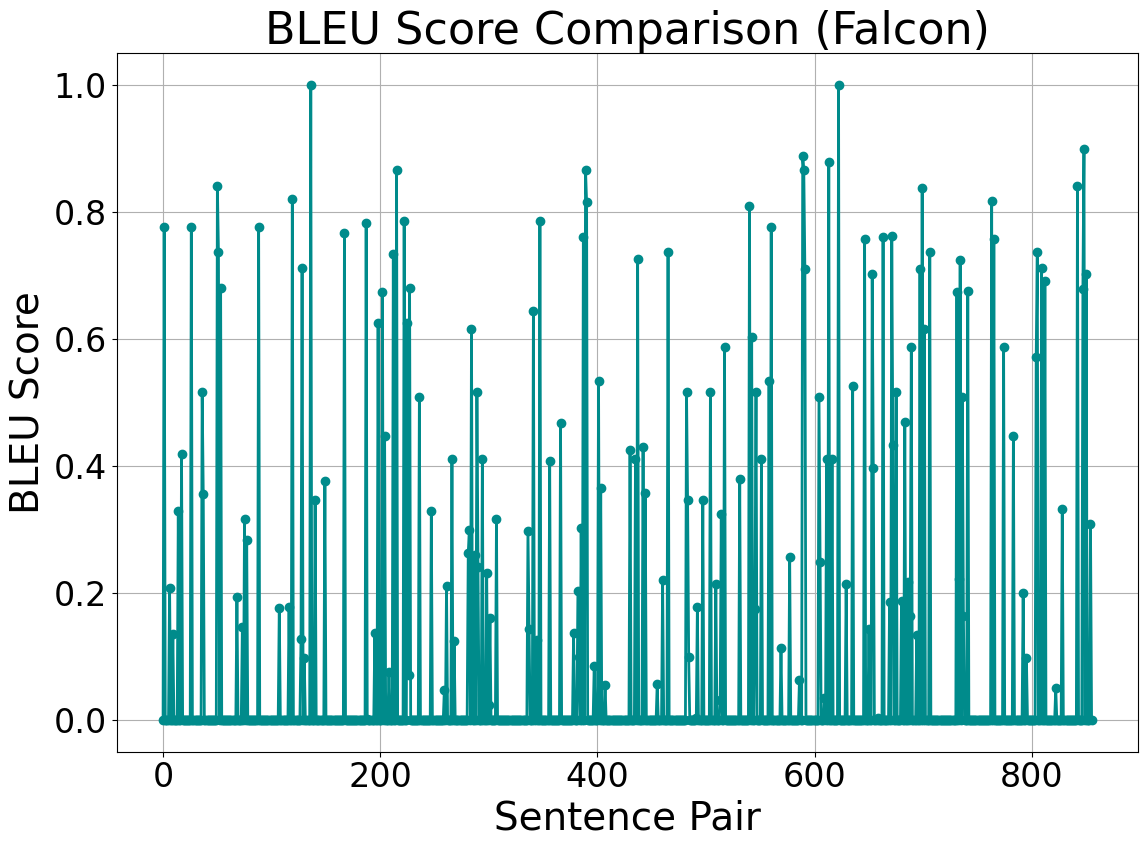

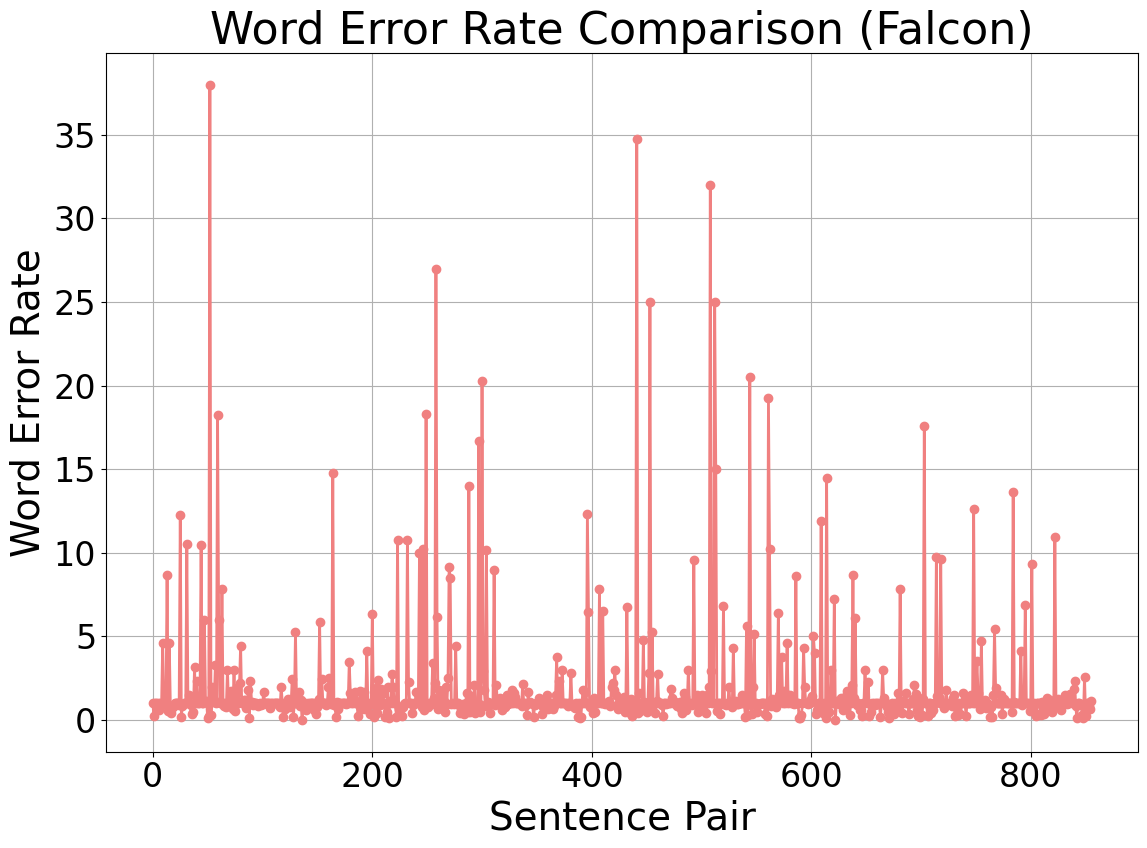

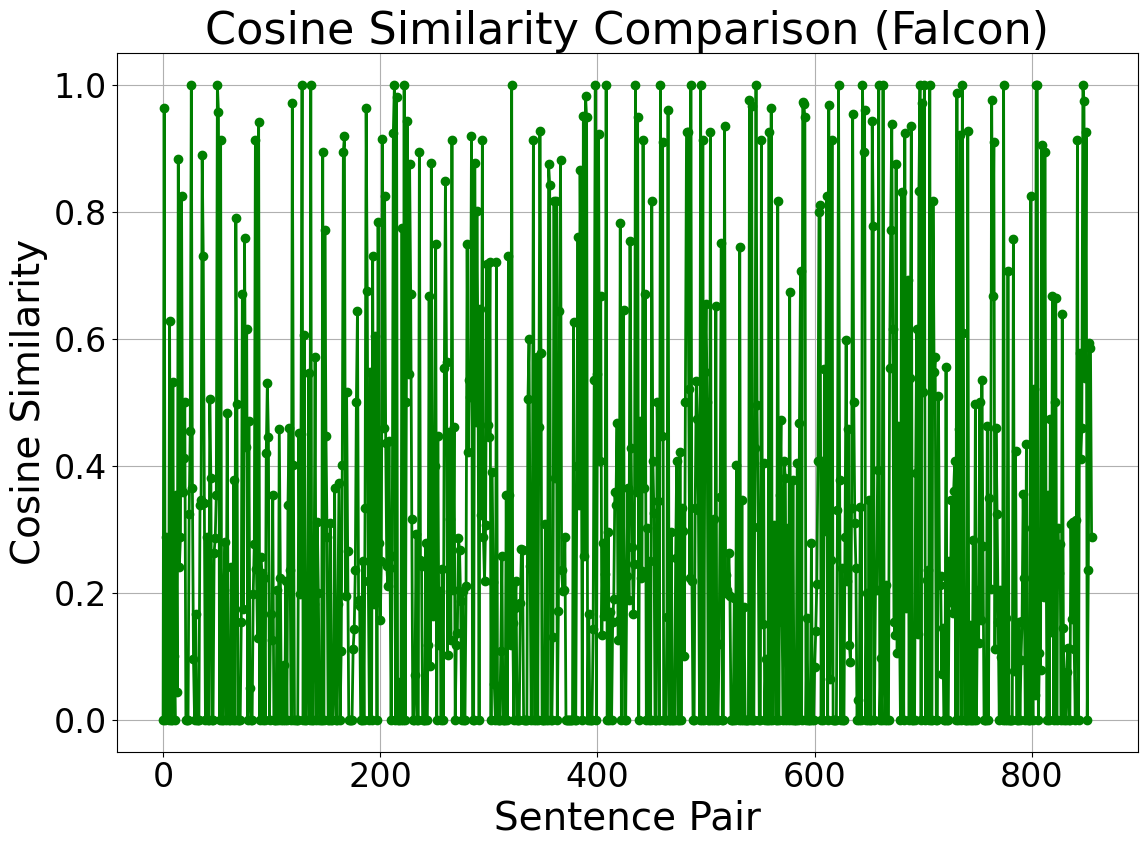

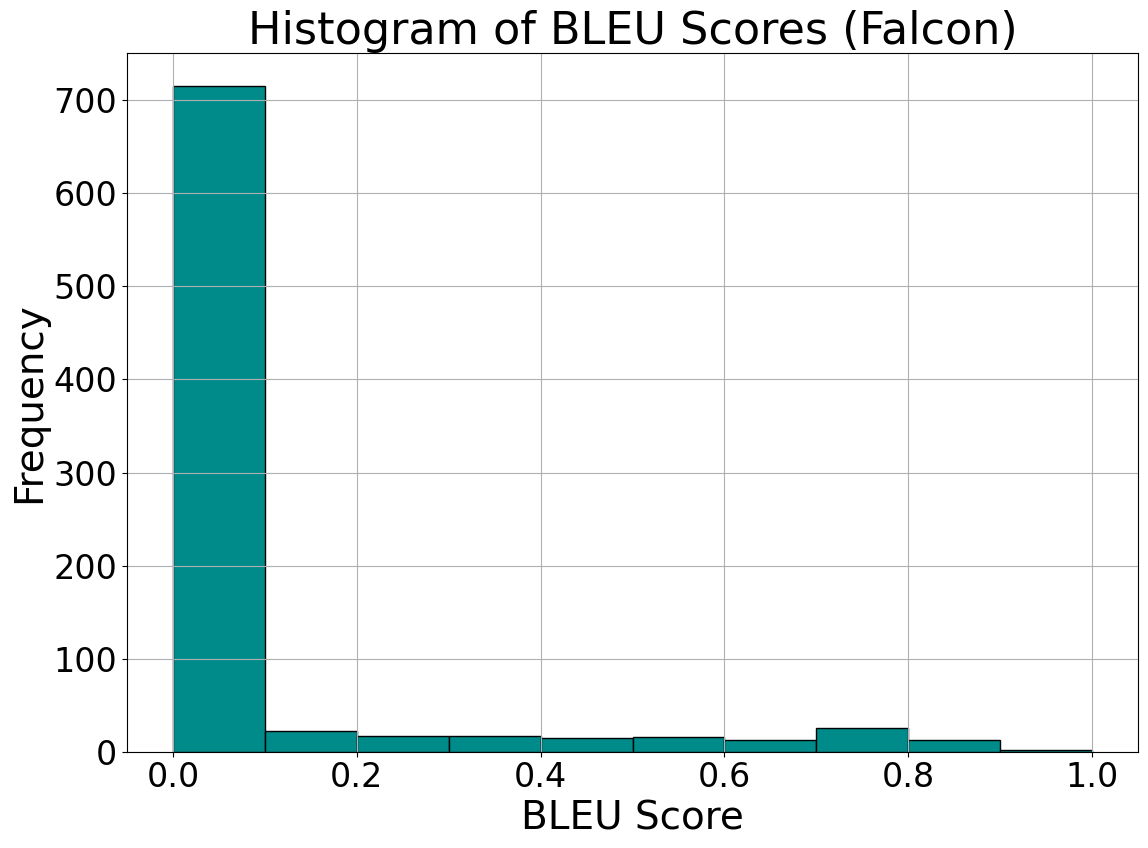

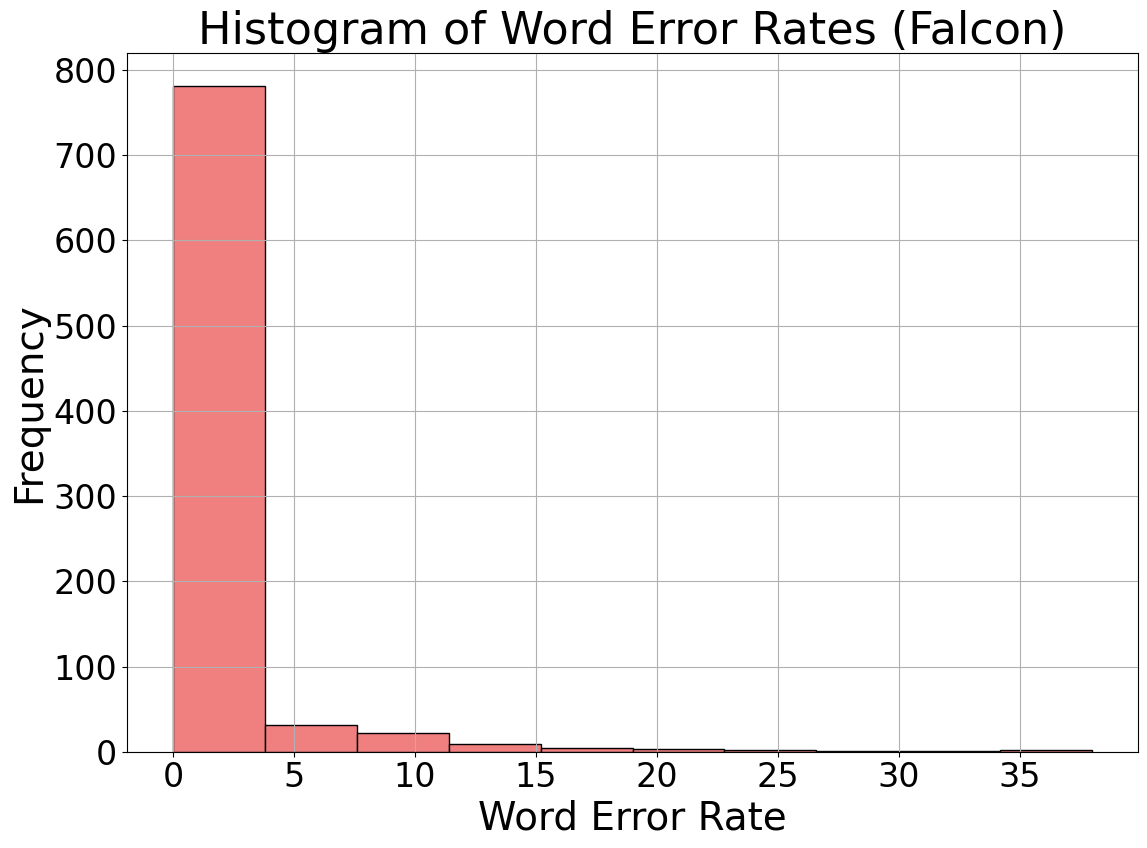

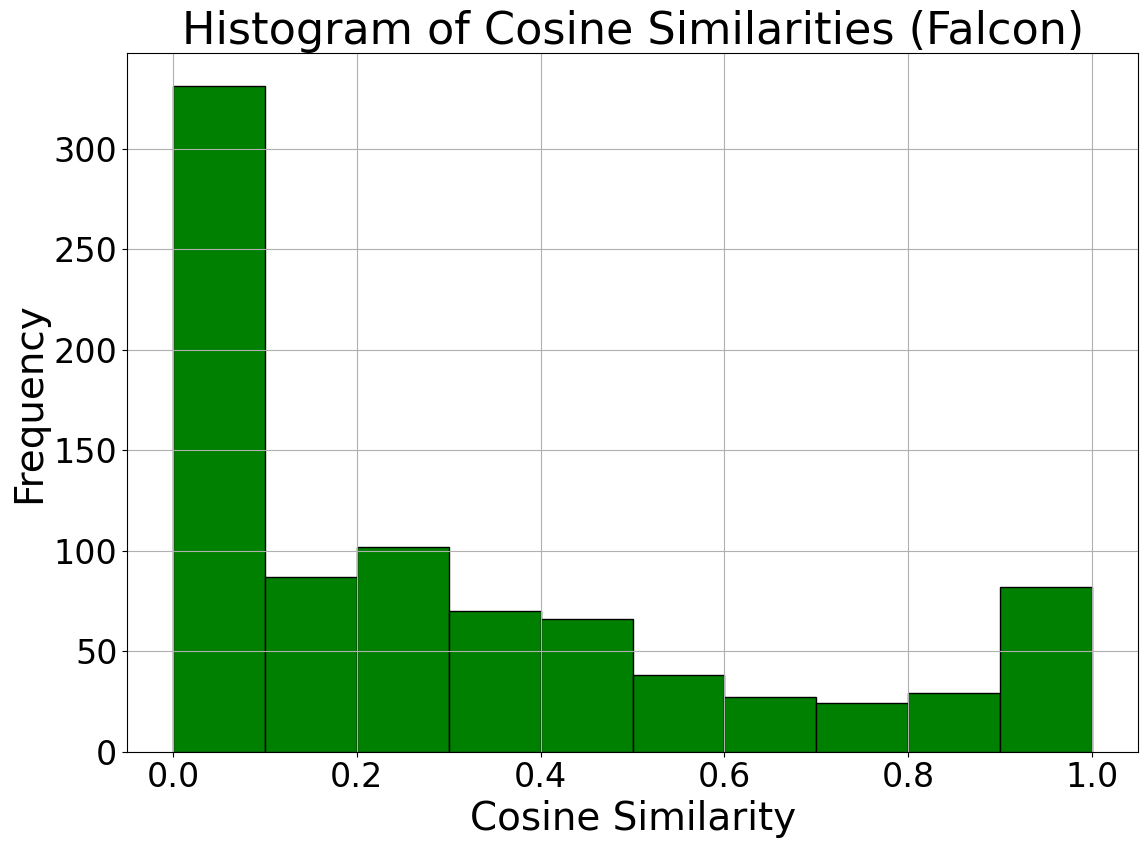

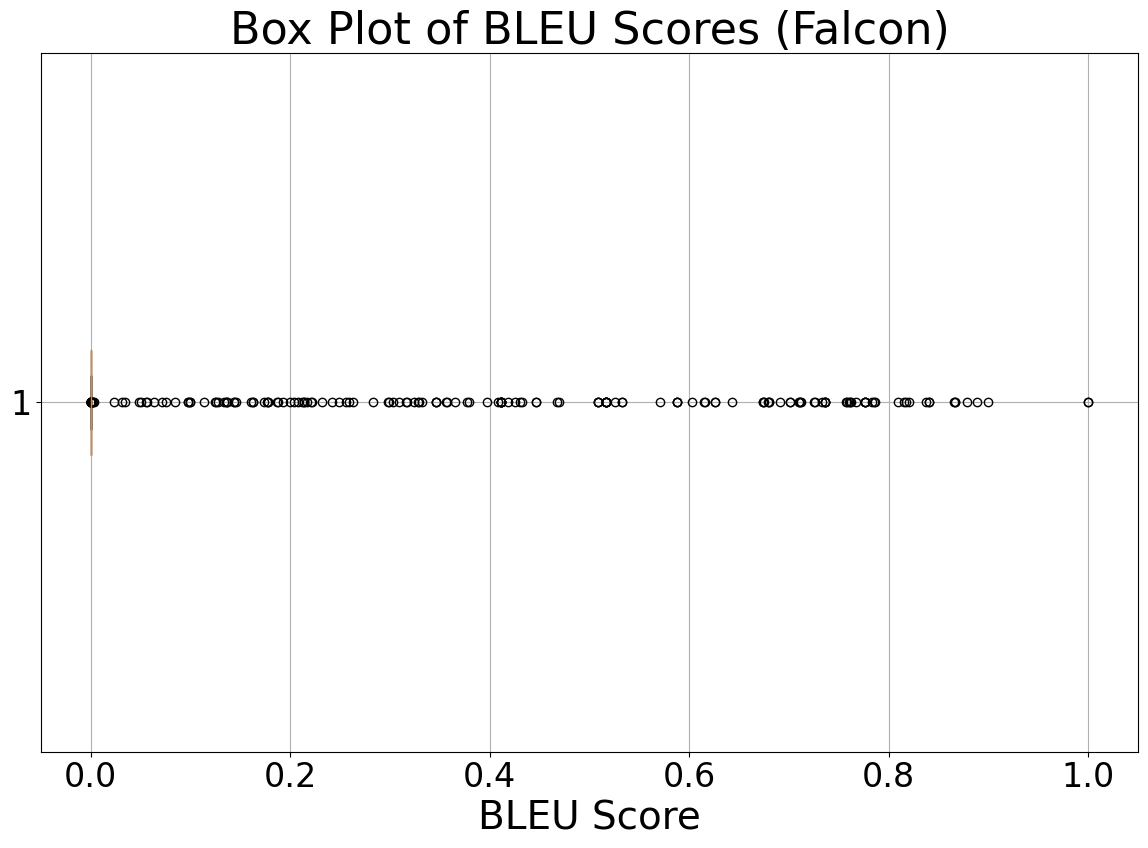

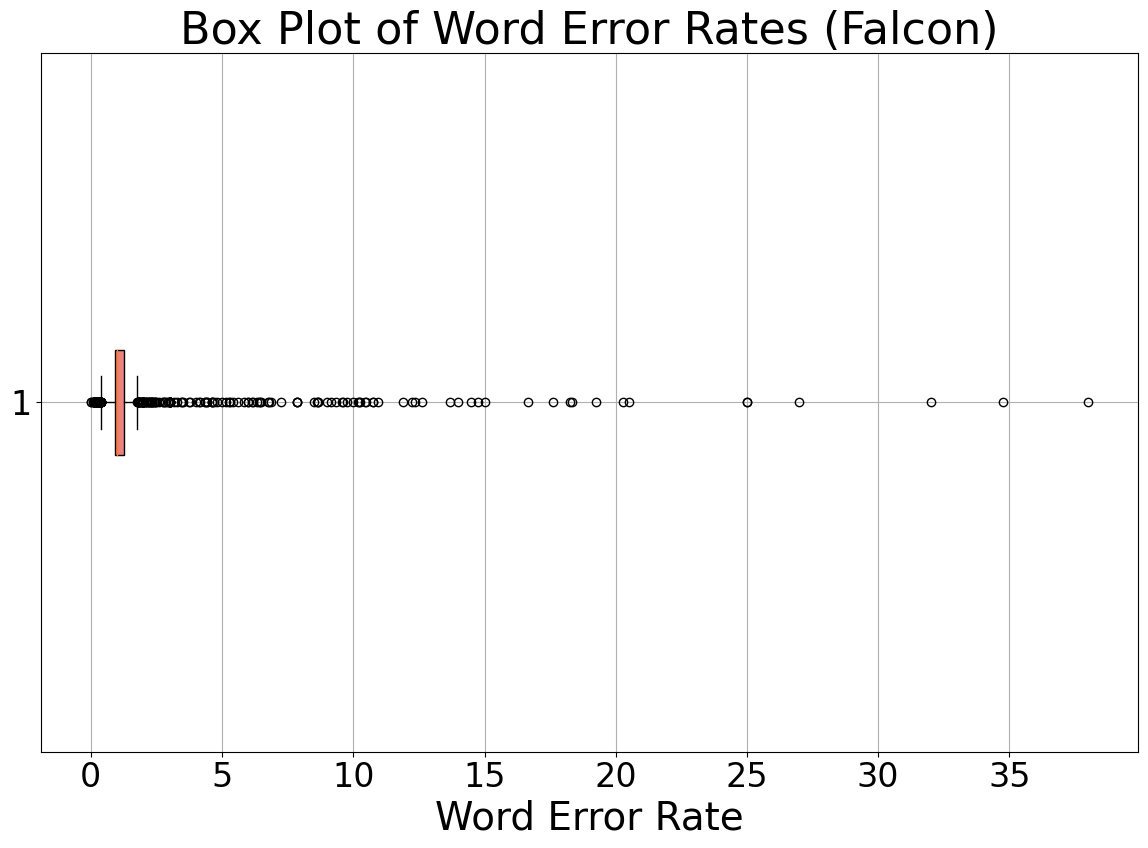

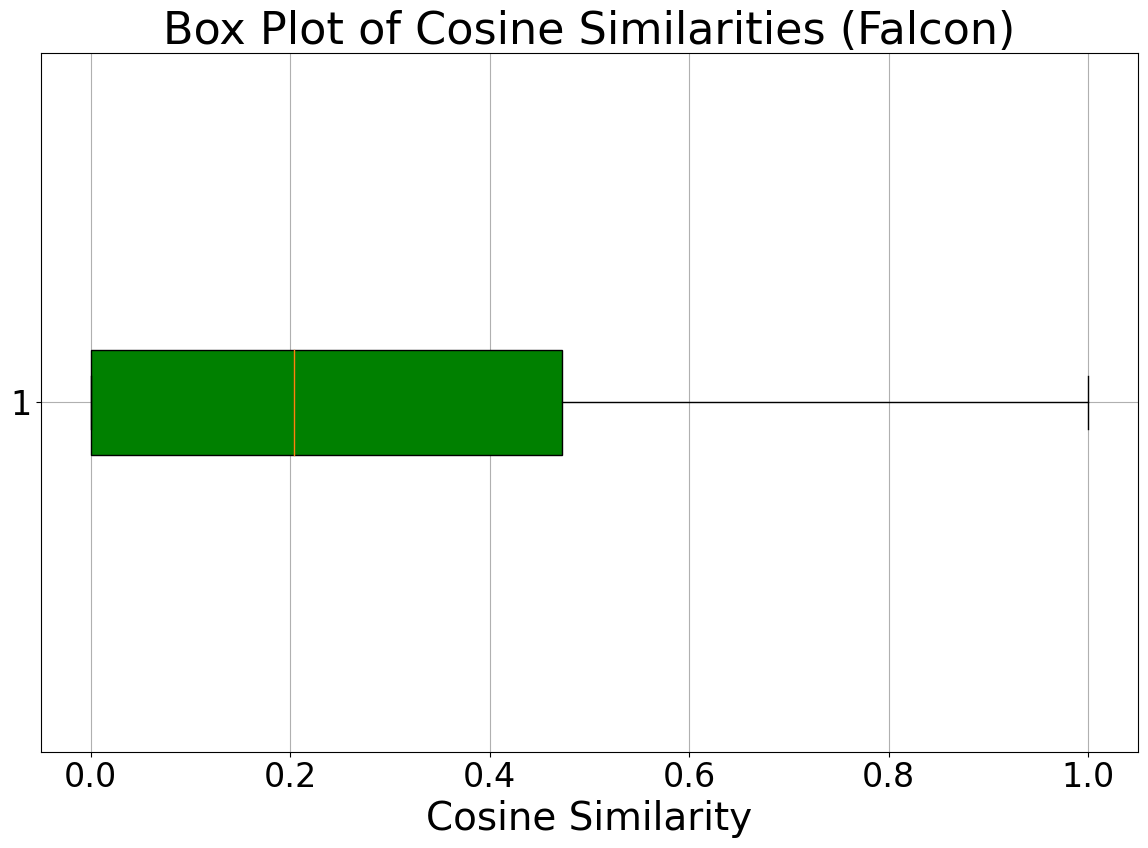

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from nltk.translate.meteor_score import single_meteor_score
from jiwer import wer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize Rouge for ROUGE score calculation
rouge = Rouge()

# Initialize CountVectorizer for cosine similarity calculation
vectorizer = CountVectorizer()

# Initialize lists to store the metrics
bleu_scores = []
word_error_rates = []
cosine_similarities = []

mygt = ground_truth.copy()
mypt = predicted.copy()

for gt, prediction in zip(mygt, mypt):
    gt = str(gt)
    prediction = str(prediction)
    # Calculate BLEU score
    bleu_score = sentence_bleu([gt.split()], prediction.split())
    bleu_scores.append(bleu_score)

    # Calculate Word Error Rate
    error = wer(gt, prediction)
    word_error_rates.append(error)

    # Calculate Cosine Similarity
    vectors = vectorizer.fit_transform([gt, prediction]).toarray()
    csim = cosine_similarity(vectors)[0][1]
    cosine_similarities.append(csim)

# Convert lists to numpy arrays
bleu_scores = np.array(bleu_scores)
word_error_rates = np.array(word_error_rates)
cosine_similarities = np.array(cosine_similarities)

# Calculate average scores with 95% confidence intervals
bleu_mean = np.mean(bleu_scores)
bleu_std = np.std(bleu_scores)
bleu_ci = 1.96 * (bleu_std / np.sqrt(len(bleu_scores)))

wer_mean = np.mean(word_error_rates)
wer_std = np.std(word_error_rates)
wer_ci = 1.96 * (wer_std / np.sqrt(len(word_error_rates)))

cosine_mean = np.mean(cosine_similarities)
cosine_std = np.std(cosine_similarities)
cosine_ci = 1.96 * (cosine_std / np.sqrt(len(cosine_similarities)))

# Print average scores with confidence intervals
print("Average Scores with 95% Confidence Intervals:")
print(f"BLEU Score: {bleu_mean:.4f} +/- {bleu_ci:.4f}")
print(f"Word Error Rate: {wer_mean:.4f} +/- {wer_ci:.4f}")
print(f"Cosine Similarity: {cosine_mean:.4f} +/- {cosine_ci:.4f}")
print()

# Define custom colors for the plots
color_bleu = 'darkcyan'
color_wer = 'lightcoral'
color_cosine = 'green'

# Set a larger font size for all text elements
plt.rcParams.update({'font.size': 24})

# Plot BLEU Score
plt.figure(figsize=(12, 9))
plt.plot(bleu_scores, color=color_bleu, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sentence Pair', fontsize=28)  # Increase font size
plt.ylabel('BLEU Score', fontsize=28)     # Increase font size
plt.title('BLEU Score Comparison (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_scores.png', dpi=300)
plt.show()

# Plot Word Error Rate
plt.figure(figsize=(12, 9))
plt.plot(word_error_rates, color=color_wer, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sentence Pair', fontsize=28)  # Increase font size
plt.ylabel('Word Error Rate', fontsize=28)  # Increase font size
plt.title('Word Error Rate Comparison (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('word_error_rates.png', dpi=300)
plt.show()

# Plot Cosine Similarity
plt.figure(figsize=(12, 9))
plt.plot(cosine_similarities, color=color_cosine, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sentence Pair', fontsize=28)  # Increase font size
plt.ylabel('Cosine Similarity', fontsize=28)  # Increase font size
plt.title('Cosine Similarity Comparison (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_similarities.png', dpi=300)
plt.show()

# Plot Histogram for BLEU Score
plt.figure(figsize=(12, 9))
plt.hist(bleu_scores, bins=10, color=color_bleu, edgecolor='black')
plt.xlabel('BLEU Score', fontsize=28)  # Increase font size
plt.ylabel('Frequency', fontsize=28)   # Increase font size
plt.title('Histogram of BLEU Scores (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_histogram.png', dpi=300)
plt.show()

# Plot Histogram for Word Error Rate
plt.figure(figsize=(12, 9))
plt.hist(word_error_rates, bins=10, color=color_wer, edgecolor='black')
plt.xlabel('Word Error Rate', fontsize=28)  # Increase font size
plt.ylabel('Frequency', fontsize=28)        # Increase font size
plt.title('Histogram of Word Error Rates (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('wer_histogram.png', dpi=300)
plt.show()

# Plot Histogram for Cosine Similarity
plt.figure(figsize=(12, 9))
plt.hist(cosine_similarities, bins=10, color=color_cosine, edgecolor='black')
plt.xlabel('Cosine Similarity', fontsize=28)  # Increase font size
plt.ylabel('Frequency', fontsize=28)           # Increase font size
plt.title('Histogram of Cosine Similarities (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_histogram.png', dpi=300)
plt.show()

# Box Plot for BLEU Score
plt.figure(figsize=(12, 9))
plt.boxplot(bleu_scores, vert=False, patch_artist=True, boxprops=dict(facecolor=color_bleu))
plt.xlabel('BLEU Score', fontsize=28)  # Increase font size
plt.title('Box Plot of BLEU Scores (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_boxplot.png', dpi=300)
plt.show()

# Box Plot for Word Error Rate
plt.figure(figsize=(12, 9))
plt.boxplot(word_error_rates, vert=False, patch_artist=True, boxprops=dict(facecolor=color_wer))
plt.xlabel('Word Error Rate', fontsize=28)  # Increase font size
plt.title('Box Plot of Word Error Rates (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('wer_boxplot.png', dpi=300)
plt.show()

# Box Plot for Cosine Similarity
plt.figure(figsize=(12, 9))
plt.boxplot(cosine_similarities, vert=False, patch_artist=True, boxprops=dict(facecolor=color_cosine))
plt.xlabel('Cosine Similarity', fontsize=28)  # Increase font size
plt.title('Box Plot of Cosine Similarities (Falcon)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_boxplot.png', dpi=300)
plt.show()


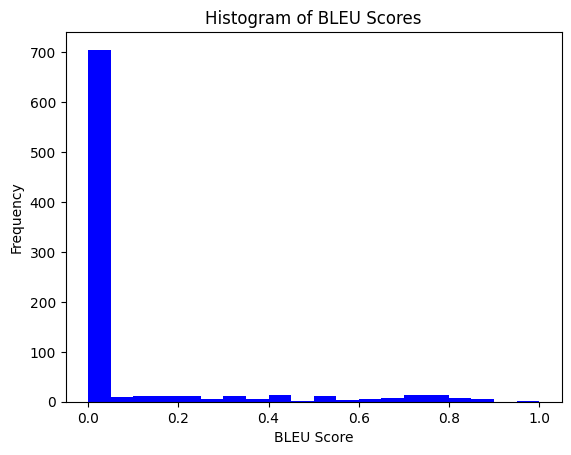

In [ ]:
plt.hist(bleu_scores, bins=20, color='blue')
plt.title('Histogram of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.show()


Number of Examples with BLEU Score >= 0.5: 70
Number of Examples with Cosine Similarity >= 0.5: 201


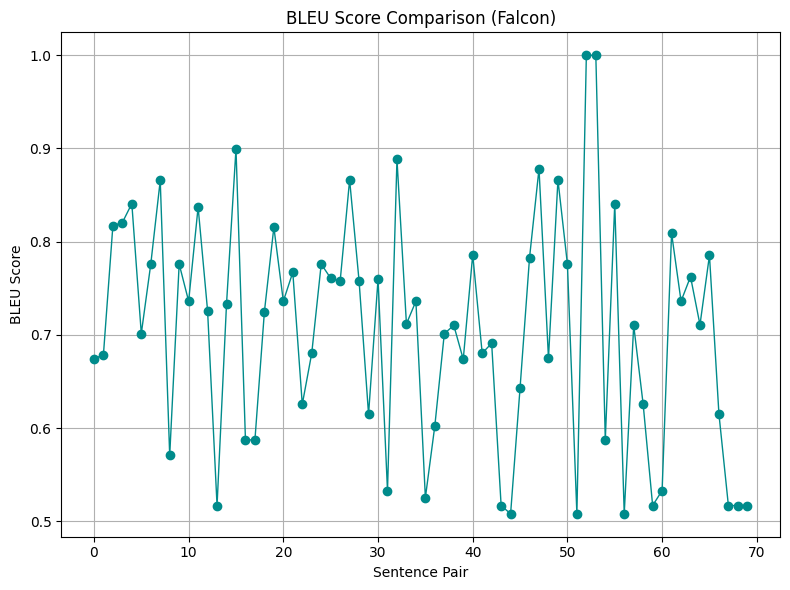

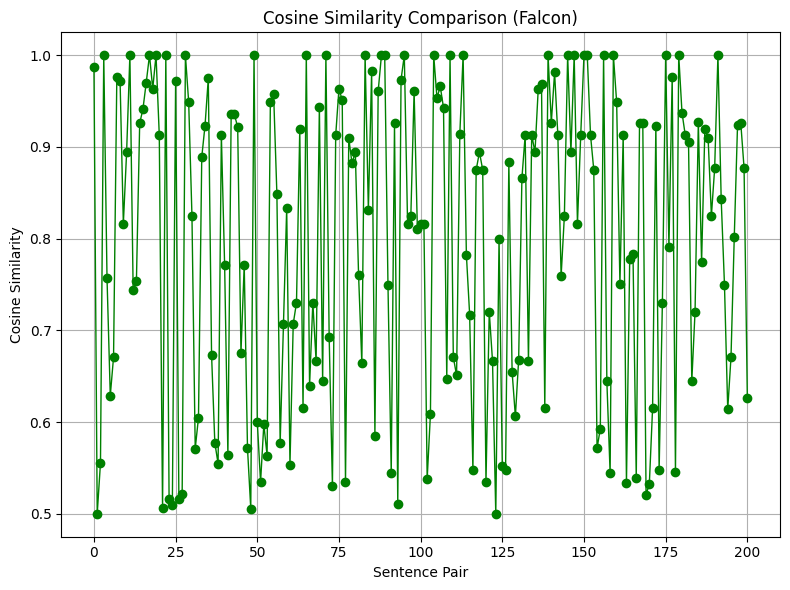

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from jiwer import wer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize CountVectorizer for cosine similarity calculation
vectorizer = CountVectorizer()

# Initialize lists to store the metrics
bleu_scores = []
word_error_rates = []
cosine_similarities = []

mygt = ground_truth.copy()
mypt = predicted.copy()

for gt, prediction in zip(mygt, mypt):
    gt = str(gt)
    prediction = str(prediction)
    # Calculate BLEU score
    bleu_score = sentence_bleu([gt.split()], prediction.split())
    bleu_scores.append(bleu_score)

    # Calculate Word Error Rate
    error = wer(gt, prediction)
    word_error_rates.append(error)

    # Calculate Cosine Similarity
    vectors = vectorizer.fit_transform([gt, prediction]).toarray()
    csim = cosine_similarity(vectors)[0][1]
    cosine_similarities.append(csim)

# Convert lists to numpy arrays
bleu_scores = np.array(bleu_scores)
word_error_rates = np.array(word_error_rates)
cosine_similarities = np.array(cosine_similarities)

# Filter scores >= 0.5
bleu_filtered = bleu_scores[bleu_scores >= 0.5]
cosine_filtered = cosine_similarities[cosine_similarities >= 0.5]

# Calculate the count of examples
bleu_count = len(bleu_filtered)
cosine_count = len(cosine_filtered)

# Print the count of examples
print("Number of Examples with BLEU Score >= 0.5:", bleu_count)
print("Number of Examples with Cosine Similarity >= 0.5:", cosine_count)

# Define custom colors for the plots
color_bleu = 'darkcyan'
color_cosine = 'green'

# Plot BLEU Score (filtered)
plt.figure(figsize=(8, 6))
plt.plot(bleu_filtered, color=color_bleu, marker='o', linestyle='-', linewidth=1)
plt.xlabel('Sentence Pair')
plt.ylabel('BLEU Score')
plt.title('BLEU Score Comparison (Falcon)')
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_scores.png', dpi=300)
plt.show()

# Plot Cosine Similarity (filtered)
plt.figure(figsize=(8, 6))
plt.plot(cosine_filtered, color=color_cosine, marker='o', linestyle='-', linewidth=1)
plt.xlabel('Sentence Pair')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Comparison (Falcon)')
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_similarities.png', dpi=300)
plt.show()
